In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import numpy as np
from sympy import *
from sympy import lambdify
from sympy.utilities.lambdify import lambdastr

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from IPython.display import HTML

from time import time
from src.support_class import *
from src import jeffery_model as jm
from IPython.display import display

init_printing(use_latex='mathjax')


In [38]:
alpha = 100
B = np.array((1, 0, 0))
lbd = (alpha ** 2 - 1) / (alpha ** 2 + 1)
lbd

0.9998000199980002

zi=-0.250000
TrB2 38.84418499395126 -0.002815472024208068
TrB3 0.545637379827387 -98.83559826588953
Delta 9.761379169503925e-05 -2.2499280486280627e-08

zi=-0.200000
TrB2 148.0767996791279 -0.01054788890678085
TrB3 6.1071150041326 -735.6223306113468
Delta 0.00539361935807392 -1.1735501118025132e-06

zi=-0.150000
TrB2 830.755802726118 -0.057240541327776194
TrB3 81.28462281580391 -9775.398033735735
Delta 0.9586223885416985 -0.0001875685308533733

zi=-0.100000
TrB2 9422.707824711459 -0.5839902514878044
TrB3 3117.7291082509605 -373411.7350148663
Delta 1415.3806457519531 -0.2133467833708679

zi=-0.050000
TrB2 589397.6574352873 -10.845677358873218
TrB3 1573299.788634499 -184729809.7334726
Delta 356085578.0 -18214.870626647607

zi=0.000000
TrB2 1142871439451.0837 -7760.32319797104
TrB3 4.987928384618968e+17 -980795020947479.6
Delta 1.6160647873110822e+30 -6995990484015.91

zi=0.050000
TrB2 589397.6574352833 -10.845677358893056
TrB3 1573299.788634486 -184729809.73347056
Delta 356085578.0 -1821

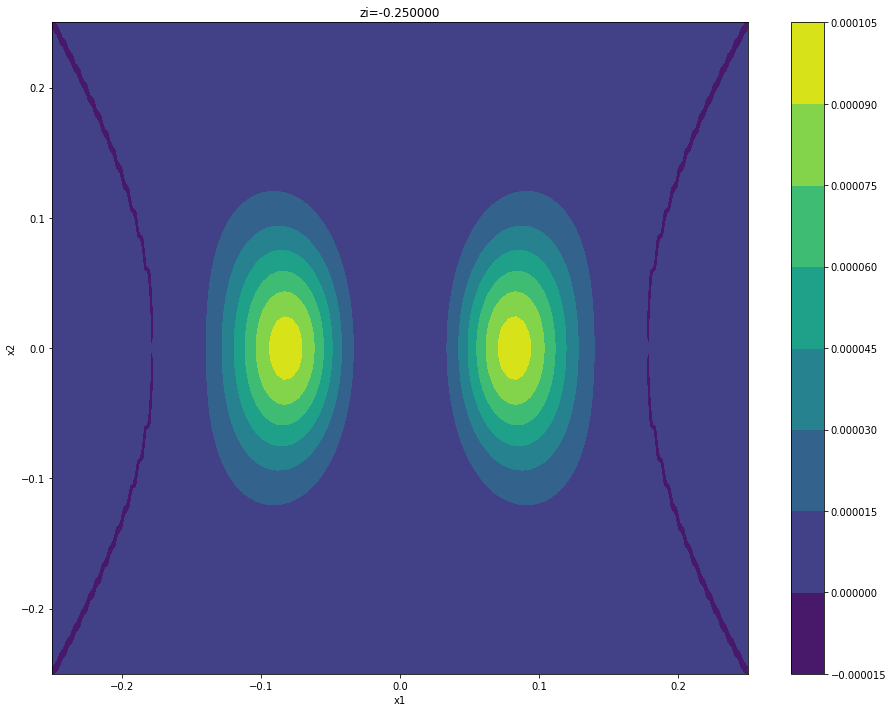

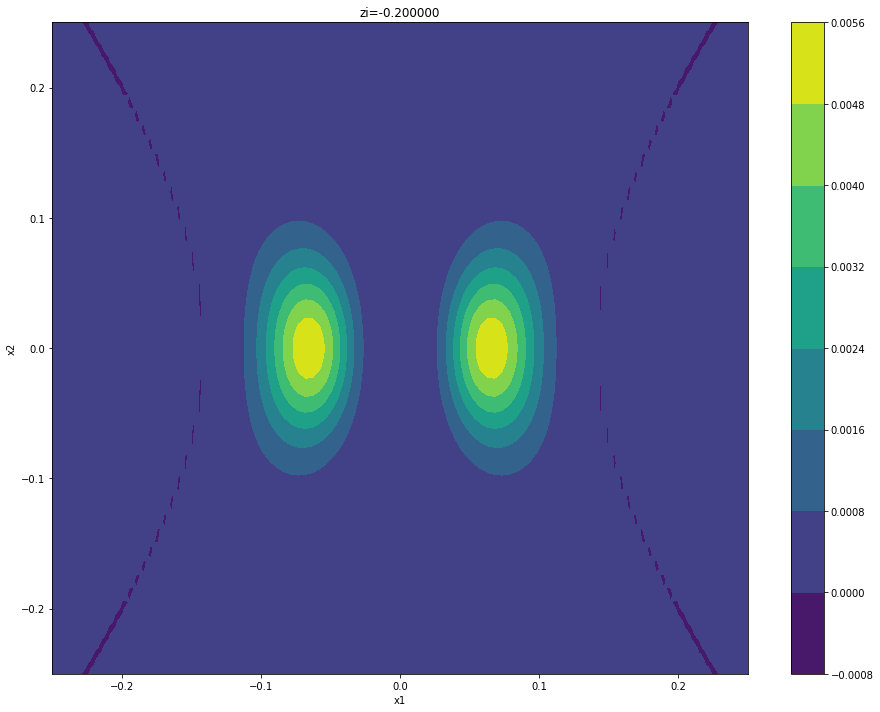

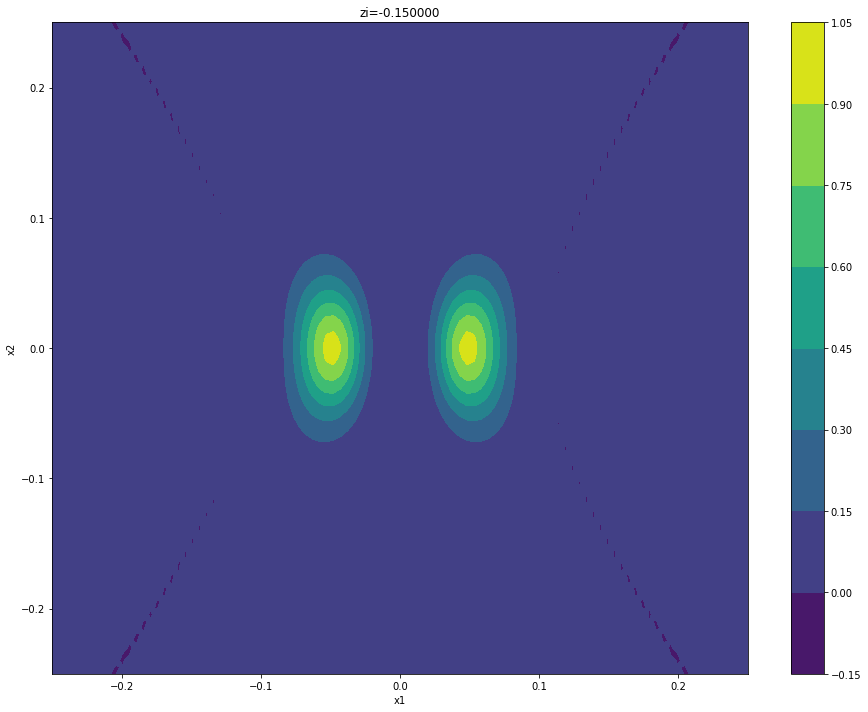

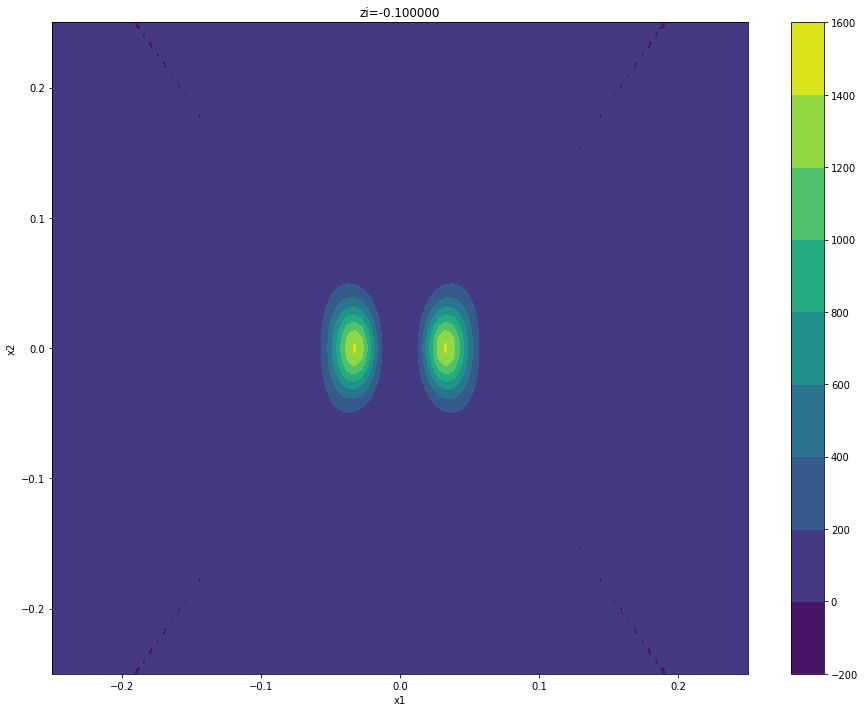

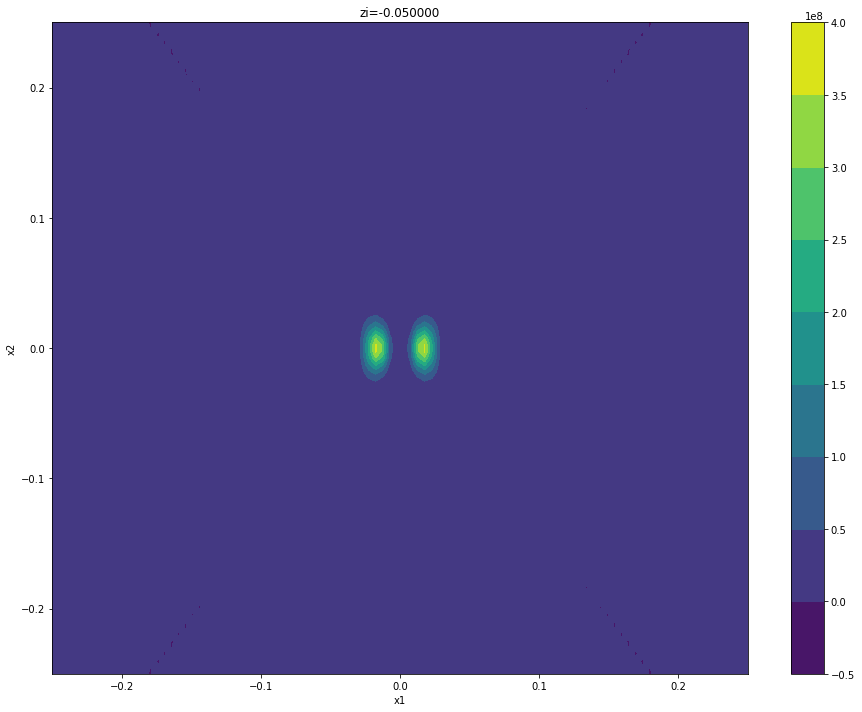

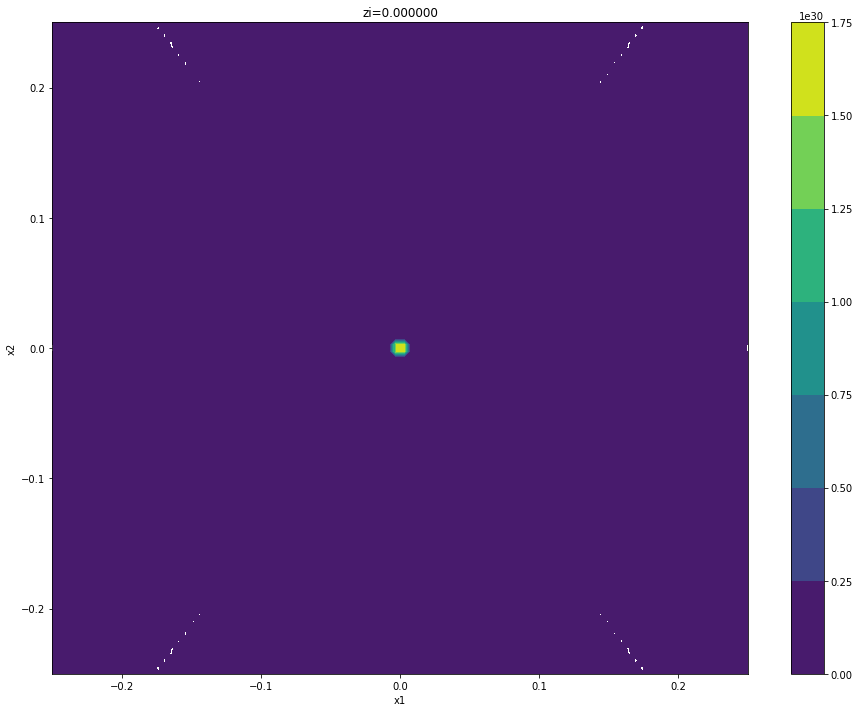

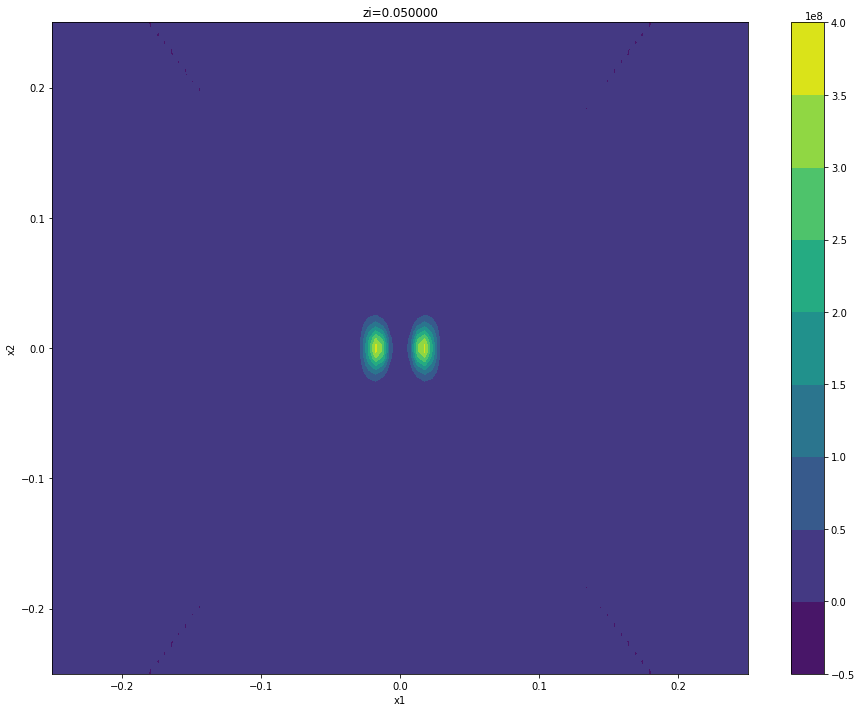

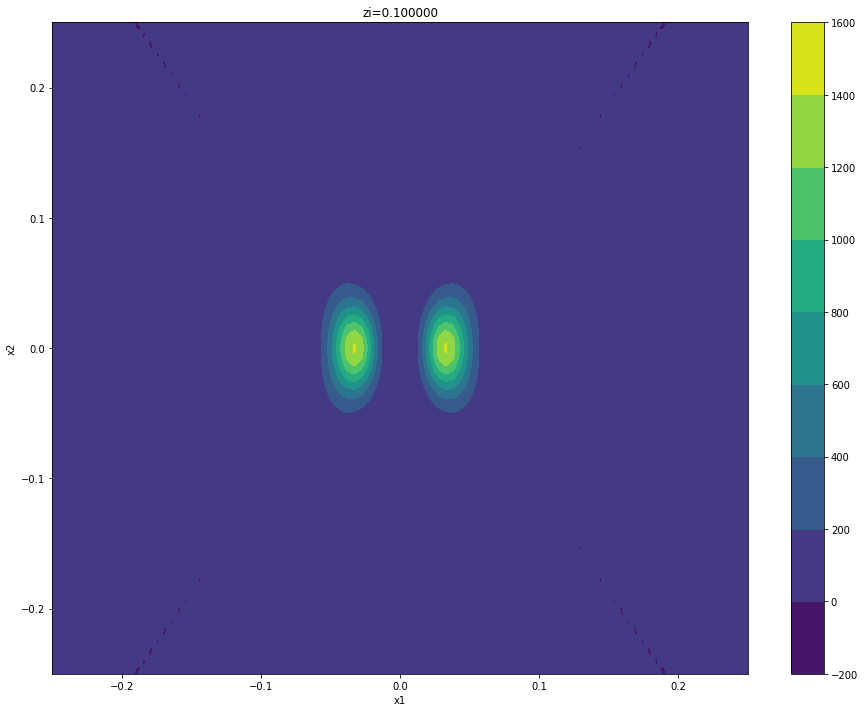

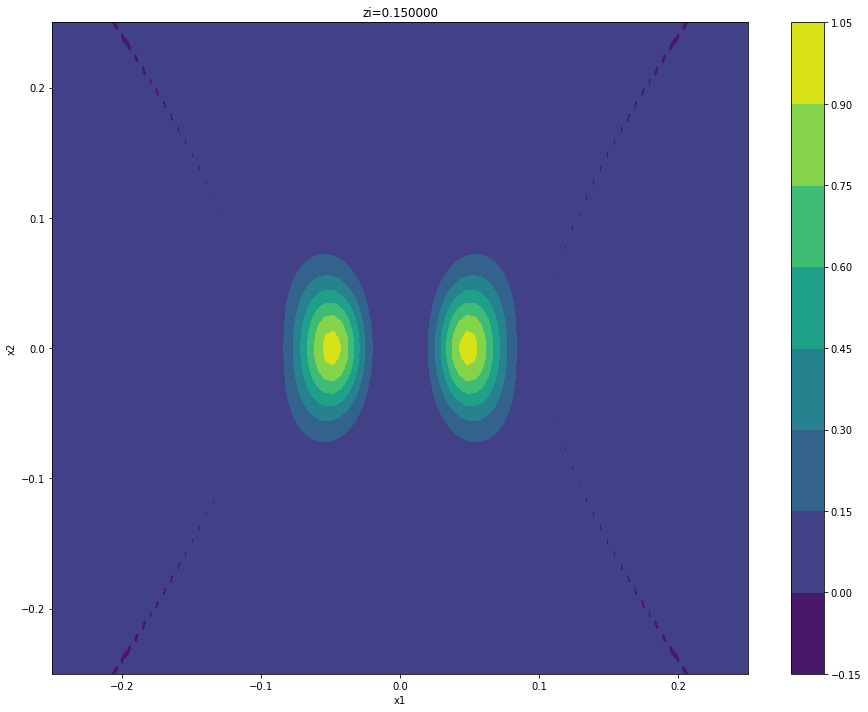

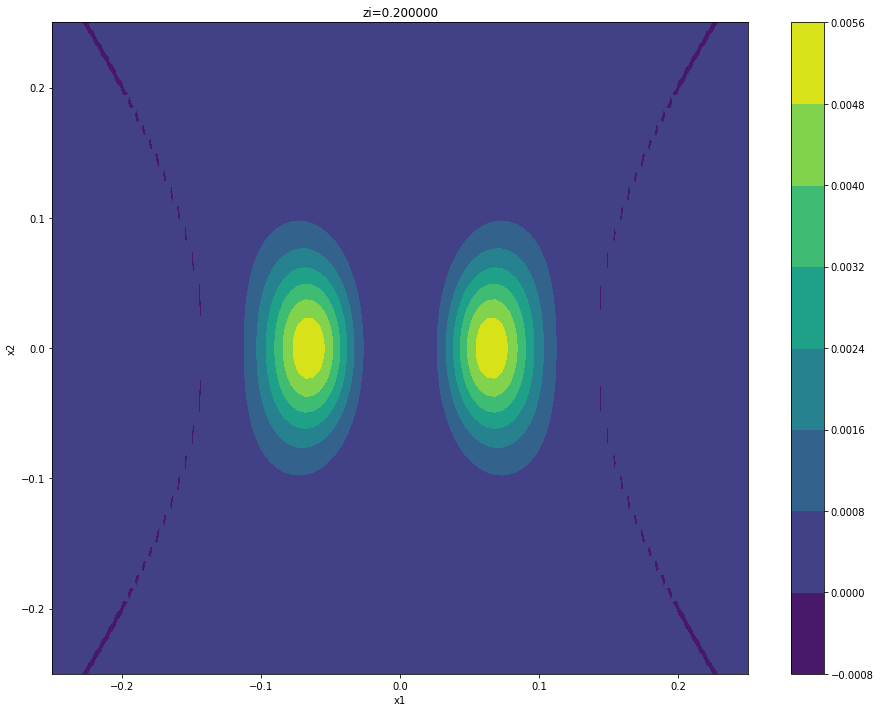

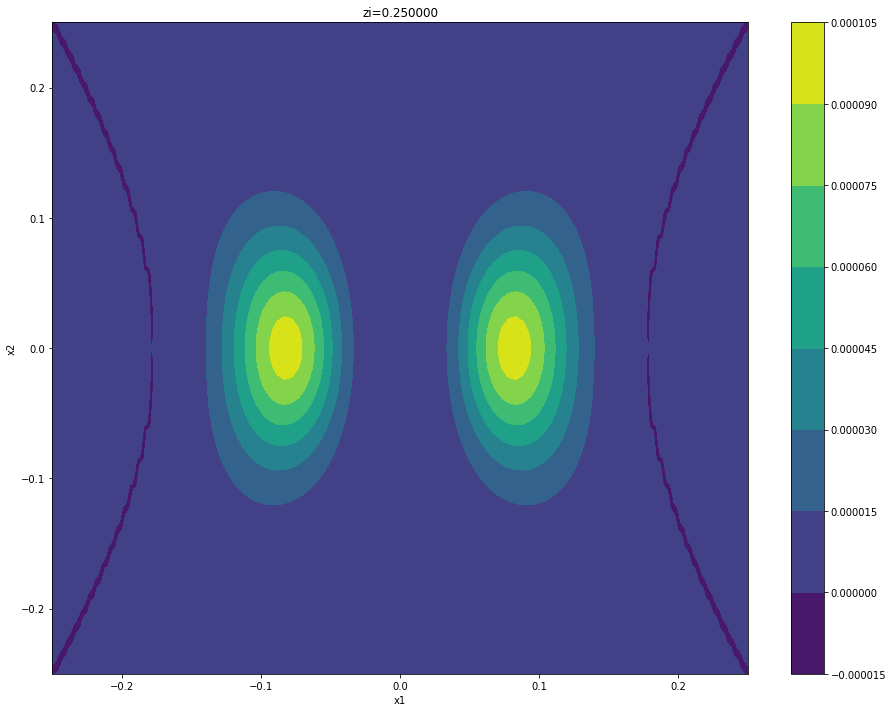

In [39]:
DoubleletStrength = np.array((1, 0, 0))
alpha = 100
B = np.array((1, 0, 0))
lbd = (alpha ** 2 - 1) / (alpha ** 2 + 1)
x, y = np.meshgrid(np.linspace(-0.25, 0.25, 100), np.linspace(-0.25, 0.25, 100))
problem = jm.SingleDoubleletJefferyProblem(B=B, DoubleletStrength=DoubleletStrength)

for zi in np.linspace(-0.25, 0.25, 11):
    location = np.vstack((x.flatten(), y.flatten(), np.ones_like(y.flatten()) * zi))
    Jij = problem.J_matrix(location)
    JijT = Jij.transpose(1, 0, 2)
    Sij = 1 / 2 * (Jij + JijT)
    Oij = 1 / 2 * (Jij - JijT)
    Bij = (Oij + lbd * Sij).transpose((2, 0, 1))
    TrB2 = []
    TrB3 = []
    for bij in Bij:
        b2 = np.dot(bij, bij)
        b3 = np.dot(b2, bij)
        TrB2.append(np.trace(b2))
        TrB3.append(np.trace(b3))
    TrB2 = np.hstack(TrB2).reshape(x.shape)
    TrB3 = np.hstack(TrB3).reshape(x.shape)
    DtLine = TrB2 ** 3 - 6 * TrB3 ** 2
    print('zi=%f' % zi)
    print('TrB2', TrB2.max(), TrB2.min(), )
    print('TrB3', TrB3.max(), TrB3.min(), )
    print('Delta', DtLine.max(), DtLine.min(), )
    print()
    
    fig = plt.figure(figsize=(13, 10))
    fig.patch.set_facecolor('white')
    ax0 = fig.add_subplot(1, 1, 1)
#     cf = ax0.contourf(x, y, np.log10(TrB2))
    cf = ax0.contourf(x, y, DtLine)
    plt.colorbar(cf, ax=ax0, orientation='vertical')
    ax0.set_xlabel('x1')
    ax0.set_ylabel('x2')
    ax0.set_title('zi=%f' % zi)
    plt.tight_layout()


zi=1.000000
-0.000117269888474928 -0.00316628679112015
9.253218692939276e-38 -9.078775725260831e-38
-1.6127220964243915e-12 -3.1743203077785355e-08



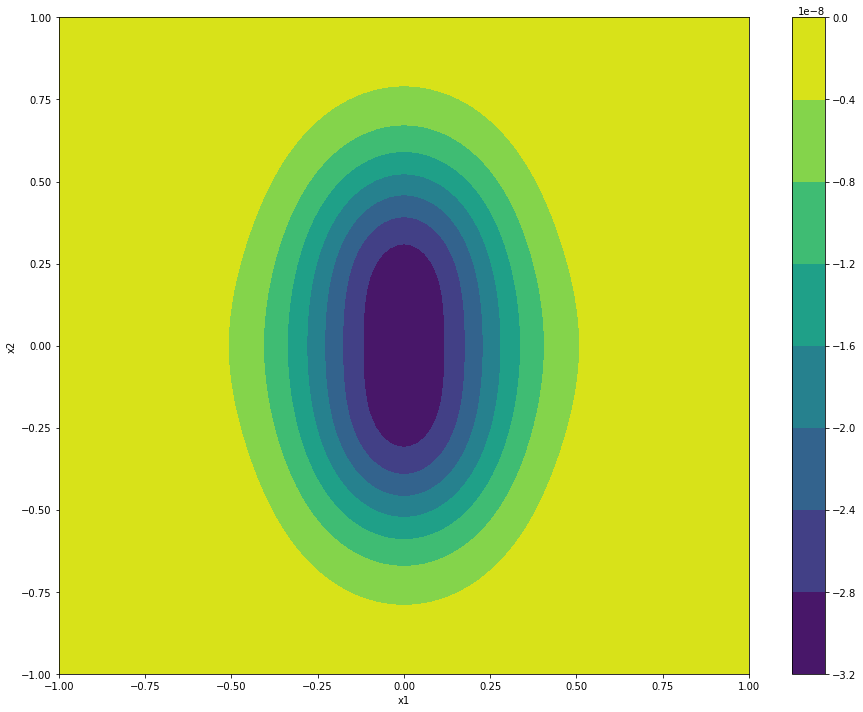

In [23]:
DoubleletStrength = np.array((1, 0, 0))
alpha = 1
B = np.array((0, 1, 0))
lbd = (alpha ** 2 - 1) / (alpha ** 2 + 1)
x, y = np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 100))
problem = jm.SingleDoubleletJefferyProblem(B=B, DoubleletStrength=DoubleletStrength)

location = np.vstack((x.flatten(), y.flatten(), np.ones_like(y.flatten()) * zi))
Jij = problem.J_matrix(location)
JijT = Jij.transpose(1, 0, 2)
Sij = 1 / 2 * (Jij + JijT)
Oij = 1 / 2 * (Jij - JijT)
Bij = (Oij + lbd * Sij).transpose((2, 0, 1))
TrB2 = []
TrB3 = []
for bij in Bij:
    b2 = np.dot(bij, bij)
    b3 = np.dot(b2, bij)
    TrB2.append(np.trace(b2))
    TrB3.append(np.trace(b3))
TrB2 = np.hstack(TrB2).reshape(x.shape)
TrB3 = np.hstack(TrB3).reshape(x.shape)
DtLine = TrB2 ** 3 - 6 * TrB3 ** 2
print('zi=%f' % zi)
print(TrB2.max(), TrB2.min(), )
print(TrB3.max(), TrB3.min(), )
print(DtLine.max(), DtLine.min(), )
print()

fig = plt.figure(figsize=(13, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)
#     cf = ax0.contourf(x, y, np.log10(TrB2))
cf = ax0.contourf(x, y, DtLine)
plt.colorbar(cf, ax=ax0, orientation='vertical')
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
plt.tight_layout()

In [21]:
DtLine

array([[-1.61272210e-12, -1.96947022e-12, -2.40412210e-12, ...,
        -2.40412210e-12, -1.96947022e-12, -1.61272210e-12],
       [-1.74895038e-12, -2.13697477e-12, -2.61025730e-12, ...,
        -2.61025730e-12, -2.13697477e-12, -1.74895038e-12],
       [-1.89785596e-12, -2.31989135e-12, -2.83517266e-12, ...,
        -2.83517266e-12, -2.31989135e-12, -1.89785596e-12],
       ...,
       [-1.89785596e-12, -2.31989135e-12, -2.83517266e-12, ...,
        -2.83517266e-12, -2.31989135e-12, -1.89785596e-12],
       [-1.74895038e-12, -2.13697477e-12, -2.61025730e-12, ...,
        -2.61025730e-12, -2.13697477e-12, -1.74895038e-12],
       [-1.61272210e-12, -1.96947022e-12, -2.40412210e-12, ...,
        -2.40412210e-12, -1.96947022e-12, -1.61272210e-12]])